In [3]:
# Install Required Packages

# pip install bs4
# pip install nltk


# Import packages

In [4]:
# You'll use requests to read in your data from the webpage, BeautifulSoup to help process your raw data, 
# nltk as the definitive natural language processing package, and RegexpTokenizer to break down your data
# into words. You should already be familiar with matplotlib and seaborn, and you'll make use of them to
# visualize the frequency counts of words at the end.

import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in Text

In [5]:
# Then, you will read in the text you'll analyze. You'll start by taking a URL to a webpage and assigning it a 
# variable name, in this case, url:

url = 'http://www.gutenberg.org/files/1184/1184-h/1184-h.htm'

In [6]:
# Once you have your URL saved to a Python variable, you can get make a request to get data from that webpage. 
# This will use the function requests.get(), and you are making it to the url webpage you just saved:

r = requests.get(url)

In [7]:
# Then, you can find out the type of that request if you like by using the function type():

type(r)

requests.models.Response

# Convert Text to soup

In [8]:
# The next few lines take the data off the webpage and extract the text, then use the html5lib to convert it 
# into something you'll be able to process and better understand, called soup.

html = r.text
soup = BeautifulSoup(html,"html.parser")
type(soup)

bs4.BeautifulSoup

# Use HTML Tags to Extract Useful Info

In [9]:
#  you can then call out certain pieces of this text. For instance, the title:

soup.title.string

# soup is the name of the webpage broken into HTML, then you are calling the title tag from the HTML and asking
# for Python to give it back as .string. The result should be this:



'The Project Gutenberg eBook of The Count of Monte Cristo, by Alexandre Dumas, pÃ¨re'

# Tokenize Data

In [10]:
# The following code uses the function get_text() to retrieve your text, and then you will use the function
# RegexpTokenizer() to break it down into words, separated by spaces. Well, in the language RegEx, \w+ is the 
# symbol for space.

# Then the function tokenize() will actually perform the operation, and you will get the first five words with [:5]:

text = soup.get_text()
tokenizer = RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)
tokens[:5]

['The', 'Project', 'Gutenberg', 'eBook', 'of']

# Remove Capitalization


In [11]:
# Should The be different from the? What about typos, like THe or thE? Probably not important. 
# You can remove capitalization like this:


words = []
for word in tokens:
    words.append(word.lower())

In [12]:
# The above code uses a for loop, and makes use of the function lower() to strip caps.
# It all goes into a dictionary named words. You can take a look at the first five entries in the dictionary 
# like this:

words[:5]

['the', 'project', 'gutenberg', 'ebook', 'of']

# Removing Stopwords

In [14]:
# There are some words that mean nothing out of context. These "boring" and "useless" words are considered 
# stopwords, and, luckily, nltk already has a list of them! You can pull them out and label them like this:

stopwords = nltk.corpus.stopwords.words('english')

In [16]:
# here are the first ten stopwords in the list:

stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [17]:
# These words don't have any emotional context, descriptive information, or tell you anything about the subject.
# So you'll want to filter these out, and others like them, so they don't clutter up your analysis.

In [19]:
wordsWithoutStops = []
for word in words:
    if word not in stopwords:
        wordsWithoutStops.append(word)
        

# This makes a dictionary named wordsWithoutStops that filters out all the stopwords,
# so only the good stuff is left. 

In [20]:
wordsWithoutStops[:10]

['project',
 'gutenberg',
 'ebook',
 'count',
 'monte',
 'cristo',
 'alexandre',
 'dumas',
 'pã',
 'project']

# Count and Plot Words

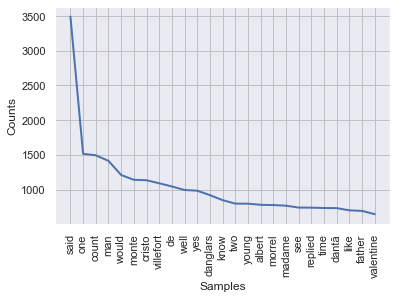

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [23]:
# You have successfully brought in data from a website with a get request, made it usable with BeautifulSoup, 
# tokenized it, and cleaned it. Now you can plot it.

sns.set()
frequencyDis = nltk.FreqDist(wordsWithoutStops)
frequencyDis.plot(25)

In [ ]:
# Line two will get a frequency count of all the words in the wordsWithoutStops dictionary, 
# using the function nltk.FreqDist(). Then you can easily plot it with the .plot() command from matplotlib.
# The 25 in parentheses says that you're only going to plot the top 25 words, though of course you could change 
# that to whatever you like.